## **What is my dataset?**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


# **Dataset description**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.
Specifically:

•	X1 Relative Compactness

•	X2 Surface Area

•	X3 Wall Area

•	X4 Roof Area

•	X5 Overall Height

•	X6 Orientation

•	X7 Glazing Area

•	X8 Glazing Area Distribution

•	Y1 Heating Load

•	Y2 Cooling Load



# **Why my dataset?**

	
	1) Relevant data although collected in 2012.
	2) Multivariate Data characteristics.
	3) Able to perform regression analysis easily.


## **What am I doing?**
In terms of regression, this fact actually means that if we manage to develop a model that returns (predicts) relatively good values for one of the two response values, the same model should predict relatively good values for the other (with a small error differentiation of course).


# **How am I reaching my goal?**
(Step-wise plan to reach my goal and check the validity of the hypothesis)

1.Loading the dataset

2.Visualizing the dataset for better understanding

3.Normalize the dataset

4.Perform correlation methods 

5.Use linear regression to predict the values of the two response variables

6.Predict the error difference to confirm the hypothesis

### **So lets begin...**

## **1.Loading the Dataset**

*   Import the necessary library packages
*   Load the data



In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


## **2.Visualizing the dataset for better understanding**

In [3]:
print(data.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
print("Statistical Description:", data.describe())

Statistical Description:                X1          X2          X3  ...         X8          Y1          Y2
count  768.000000  768.000000  768.000000  ...  768.00000  768.000000  768.000000
mean     0.764167  671.708333  318.500000  ...    2.81250   22.307195   24.587760
std      0.105777   88.086116   43.626481  ...    1.55096   10.090204    9.513306
min      0.620000  514.500000  245.000000  ...    0.00000    6.010000   10.900000
25%      0.682500  606.375000  294.000000  ...    1.75000   12.992500   15.620000
50%      0.750000  673.750000  318.500000  ...    3.00000   18.950000   22.080000
75%      0.830000  741.125000  343.000000  ...    4.00000   31.667500   33.132500
max      0.980000  808.500000  416.500000  ...    5.00000   43.100000   48.030000

[8 rows x 10 columns]


In [6]:
pandas_profiling.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,768
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,80.2 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


From the above distributions, an interesting facts can be obtained

X1 Relative Compactness has 12 possible values

X2 Surface Area has 12 possible values 

X3 Wall Area has 7 possible values 

X4 Roof Area has 4 possible values 

X5 Overall Height has 2 possible values 

X6 Orientation has 4 possible values 

X7 Glazing Area has 4 possible values 

X8 Glazing Area Distribution has 6 possible values 

Y1 Heating Load has 586 possible values 

Y2 Cooling Load has 636 possible values

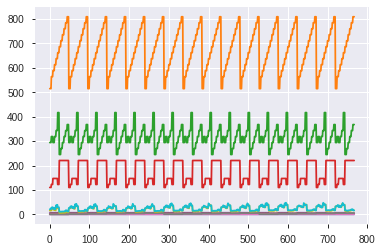

In [17]:
plt.plot(data)
plt.show()

In [0]:
df1 = data

## **3.Normalize the dataset**
Each feature has different scale, as we can see the minimum and maximum values for each of variables. To obtain a better scale, it is good to normalize the data because it makes distributions better.

In [0]:
df1 = (df1 - df1.min()) / (df1.max() - df1.min())

In [19]:
df1

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


In [0]:
x1 = df1['X1'].values
x2 = df1['X2'].values
x3 = df1['X3'].values
x4 = df1['X4'].values
x5 = df1['X5'].values
x6 = df1['X6'].values
x7 = df1['X7'].values
x8 = df1['X8'].values
y1 = df1['Y1'].values
y2 = df1['Y2'].values

## **4.Perform correlation methods**

In [21]:
corrdf = data.corr('pearson')
corrdf['Y1'].sort_values()

X4   -0.861828
X2   -0.658120
X6   -0.002587
X8    0.087368
X7    0.269842
X3    0.455671
X1    0.622272
X5    0.889430
Y2    0.975862
Y1    1.000000
Name: Y1, dtype: float64

In [22]:
corrdf['Y2'].sort_values()

X4   -0.862547
X2   -0.672999
X6    0.014290
X8    0.050525
X7    0.207505
X3    0.427117
X1    0.634339
X5    0.895785
Y1    0.975862
Y2    1.000000
Name: Y2, dtype: float64

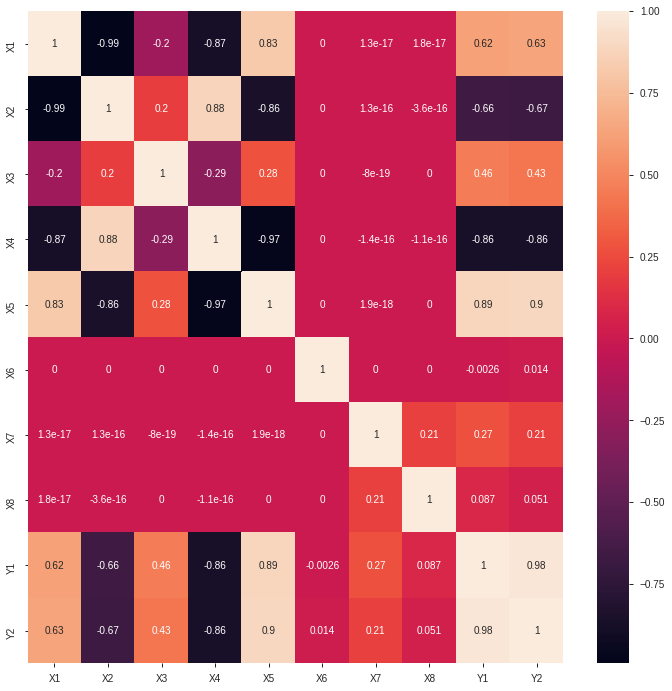

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [0]:
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

# **What is Heating Load?**

The heating load is the amount of heat energy that would need to be added to a space to maintain the temperature in an acceptable range.

(array([ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.]),
 array([ 6.01 ,  9.719, 13.428, 17.137, 20.846, 24.555, 28.264, 31.973,
        35.682, 39.391, 43.1  ]),
 <a list of 10 Patch objects>)

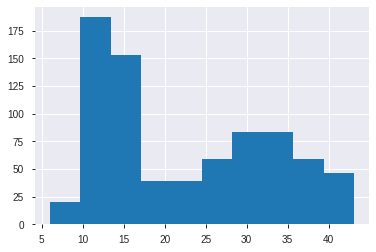

In [25]:
plt.hist((data.heating_load))

# **What is Cooling Load?**

The cooling load is the amount of heat energy that would need to be removed from a space (cooling) to maintain the temperature in an acceptable range.

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

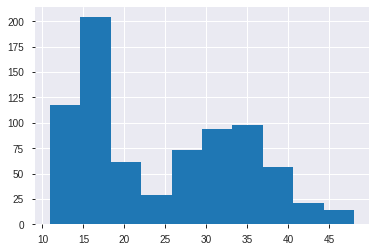

In [26]:
plt.hist((data.cooling_load))

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

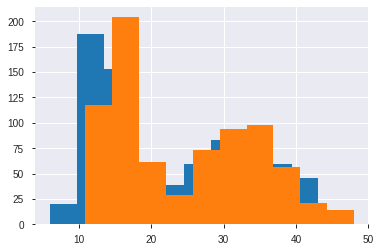

In [27]:
plt.hist((data.heating_load))

plt.hist((data.cooling_load))

As I mentioned before, the two response variables are highly correlated with each other. This means that we expect to see a similar behavior in their distribution among their different size classes. One can notice the similarity in the two charts above. Even though we can’t expect 100% similarity, I think that these charts make my point quite clear. Moreover, we should mention that “Cooling Load” max value is about 5KW larger than “Heating Load” max value and “Heating Load” min value is about 4KW lower than “Cooling Load” min value. If we take into account that “Cooling Load” has 89 more values in it’s lowest class size zone, we could safely assume that in terms of this particular dataset, there are more times that a house will need more KW to be cooled than to be heated.

## **Let us see how the 8 features have an impact on the heating load and the cooling load**

<Figure size 360x360 with 0 Axes>

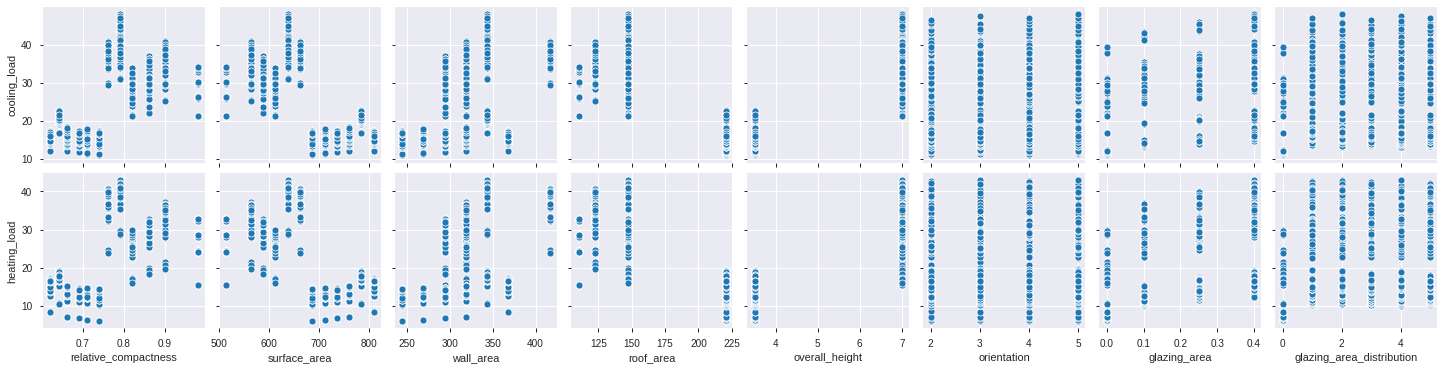

In [28]:
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

## **Lets understand each feature on a molecular level**

# X1. Relative Compactness

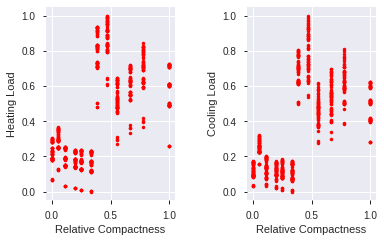

In [29]:
plt.subplot(1,2,1)
plt.plot(x1, y1, 'r.')
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x1, y2, 'r.')
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3) 

The highly correlated feature we discover is the “Relative Compactness”. For those that doesn’t have a clear view of the term, I should mention that “The Relative Compactness of a shape is derived by comparing its volume to surface area ratio to that of the most compact shape with the same volume” [2] and that ” Even though sphere is the most compact shape, it is perhaps not the ideal reference, as most buildings have orthogonal polyhedronal shapes. Using cube (the most compact polyhedron) as the reference shape, we obtain:

RCcube= 6V2 3 A–1”

## **X2.Surface Area**

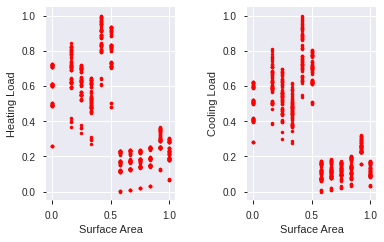

In [30]:
plt.subplot(1,2,1)
plt.plot(x2, y1, 'r.')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x2, y2, 'r.')
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

The greater the surface area the more the heat gain/ loss through it.

## **X3.Wall Area**

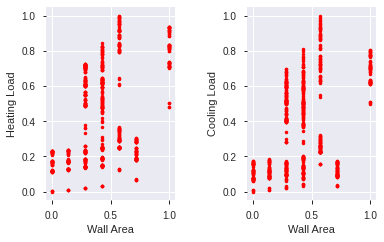

In [31]:
plt.subplot(1,2,1)
plt.plot(x3, y1, 'r.')
plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x3, y2, 'r.')
plt.xlabel('Wall Area')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

We multiply the perimeter of the room by the ceiling height to get the wall area. Wall area is mostly directly proportinal to the heating load and the cooling load.

## **X4. Roof Area**

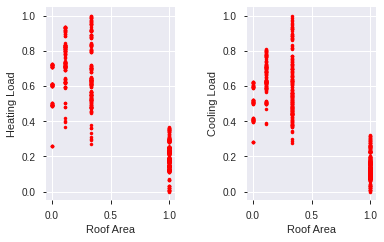

In [32]:
plt.subplot(1,2,1)
plt.plot(x4, y1, 'r.')
plt.xlabel('Roof Area')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x4, y2, 'r.')
plt.xlabel('Roof Area')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

We can clearly observe how the negative correlation between cooling load and roof area is depicted on the above chart. More or less, the important thing to keep is that for houses with large roofs (above 147m2 approximately) the energy needs tend to be minimized.

## **X5.Overall Height**

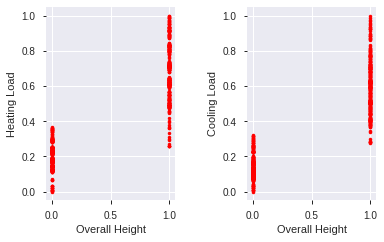

In [33]:
plt.subplot(1,2,1)
plt.plot(x5, y1, 'r.')
plt.xlabel('Overall Height')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x5, y2, 'r.')
plt.xlabel('Overall Height')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

That means that a lower house demands less energy to be heated and it actually makes sense.As expected, the values have a similar distribution as far as cooling load is concerned. Once again, it’s more efficient to cool a lower house than a taller house.

## **X6.Orientation**

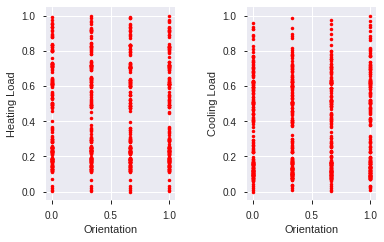

In [34]:
plt.subplot(1,2,1)
plt.plot(x6, y1, 'r.')
plt.xlabel('Orientation')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x6, y2, 'r.')
plt.xlabel('Orientation')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

Orientation is the positioning of a building in relation to seasonal variations in the sun's path as well as prevailing wind patterns. Good orientation can increase the energy efficiency of your home, making it more comfortable to live in and cheaper to run.

## **X7.Glazing Area**

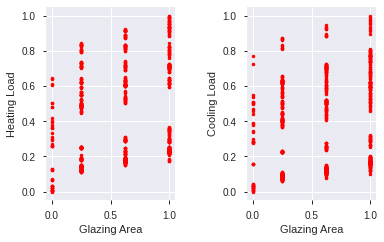

In [35]:
plt.subplot(1,2,1)
plt.plot(x7, y1, 'r.')
plt.xlabel('Glazing Area')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x7, y2, 'r.')
plt.xlabel('Glazing Area')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)


Any translucent or transparent material in exterior openings of buildings, including windows, skylights, sliding doors, the glass area of opaque doors, and glass block. The area of a glazing assembly is the interior surface area of the entire assembly, including glazing, sash, curbing, and other framing elements.

## **X8.Glazing Area Distribution**

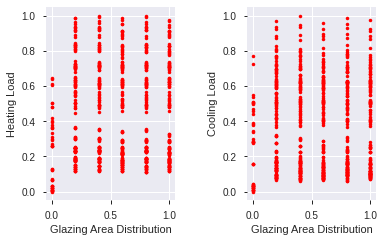

In [36]:
plt.subplot(1,2,1)
plt.plot(x8, y1, 'r.')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Heating Load')
plt.subplot(1,2,2)
plt.plot(x8, y2, 'r.')
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Cooling Load')
plt.tight_layout(pad = 3)

Glazing Area distribution determines how the glazing area is distributed throughout the building.

## **5.Use linear regression to predict the values of the two response(target) variables**

Splitting the dataset using train_test_split at y1

In [0]:
x1_train, x1_test, x5_train, x5_test, y1_train, y1_test = train_test_split(x1, x5, y1, test_size = 0.2)

The hypothesis function for predicting the heating load

In [0]:
def h1(a1,b1,c1,x1,x5):
  return (a1*x1) + (b1*x5) + c1

In [0]:
def error1(a1,b1,c1, x1,x5,y1):
  m1 = len(y1)
  e1 = 0
  for i in range(m1):
    e1 += np.power(h1(a1,b1,c1,x1[i], x5[i])-y1[i], 2)
  
  return e1/(2*m1)

In [0]:
def step_gradient1(a1,b1,c1, x1,x5,y1,learning_rate):
  grad_a1 = 0
  grad_b1 = 0
  grad_c1 = 0
  m1 = len(y1)
  for i in range(m1):
    grad_a1 += (1/m1) * (h1(a1,b1,c1,x1[i], x5[i]) - y1[i]) * x1[i]
    grad_b1 += (1/m1) * (h1(a1,b1,c1,x1[i], x5[i]) - y1[i]) * x5[i]
    grad_c1 += (1/m1) * (h1(a1,b1,c1,x1[i], x5[i]) - y1[i])

  a1 = a1 - (grad_a1 * learning_rate1)
  b1 = b1 - (grad_b1 * learning_rate1)
  c1 = c1 - (grad_c1 * learning_rate1)

  return a1,b1,c1

In [0]:
def descend1(init_a1,init_b1,init_c1,x1,x5,y1,learning_rate1,iters1):
 a1 = init_a1
 b1 = init_b1
 c1 = init_c1
 
 for i in range(iters1):
    if i%1000==0:
      print(f"Error1: {error1(a1,b1,c1,x1,x5,y1)} | a1: {a1} | b1: {b1} | c1: {c1}")
    a1,b1,c1 = step_gradient1(a1,b1,c1,x1,x5,y1,learning_rate1)

 return a1,b1,c1

In [0]:
a1 = 0
b1 = 0 
c1 = 0
learning_rate1 = 0.01
iters1 = 10000 

In [81]:
a1,b1,c1 = descend1(a1,b1,c1, x1_train,x5_train,y1_train,learning_rate1,iters1)

Error1: 0.0529004476458781 | a1: 0.3335630911447527 | b1: -0.24526536380943378 | c1: 0.43194663878816714
Error1: 0.013802508644250675 | a1: 0.3378292739420969 | b1: 0.23142504964924052 | c1: 0.19793265703845125
Error1: 0.010960604004570771 | a1: 0.22209186302055414 | b1: 0.3466510982355439 | c1: 0.17810235483800282
Error1: 0.009427579857035922 | a1: 0.1161560889176145 | b1: 0.4093396132795704 | c1: 0.18821132916364797
Error1: 0.008432345331638483 | a1: 0.02903192894551902 | b1: 0.45618249297226593 | c1: 0.19963904810893923
Error1: 0.007783069292165349 | a1: -0.04153686161991491 | b1: 0.49354622519812774 | c1: 0.20927712217088704
Error1: 0.007359441654015377 | a1: -0.09856317950671159 | b1: 0.5236677115917695 | c1: 0.21711315263986647
Error1: 0.0070830401419494345 | a1: -0.14462933123990554 | b1: 0.5479910197022663 | c1: 0.223449072295971
Error1: 0.0069026982706661445 | a1: -0.18183973835874764 | b1: 0.5676373000864013 | c1: 0.22856771733679124
Error1: 0.006785031799354414 | a1: -0.2118

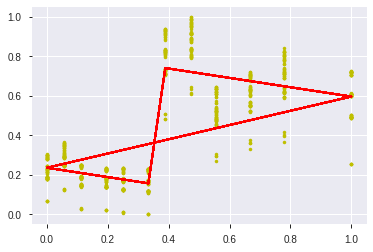

In [82]:
plt.plot(x1, y1, 'y.',
         x1, h1(a1,b1,c1,x1,x5), 'r')

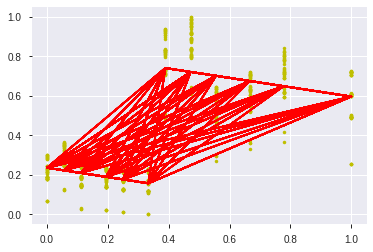

In [83]:
plt.plot(x1_train, y1_train, 'y.',
         x1_train, h1(a1,b1,c1,x1_train,x5_train), 'r')

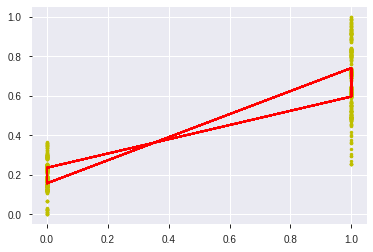

In [84]:
plt.plot(x5, y1, 'y.',
         x5, h1(a1,b1,c1,x1,x5), 'r')

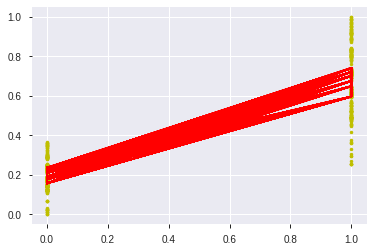

In [85]:
plt.plot(x5_train, y1_train, 'y.',
         x5_train, h1(a1,b1,c1,x1_train,x5_train), 'r')

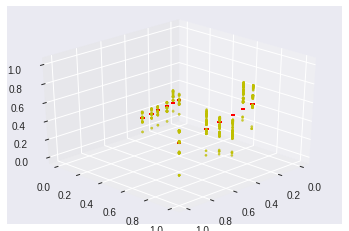

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x5_train, y1_train, c='y', marker='.')
ax.scatter(x1_train, x5_train, h1(a1,b1,c1,x1_train,x5_train), c='r', marker='_')

In [87]:
np.sqrt(error1(a1,b1,c1, x1_train,x5_train,y1_train))

0.08190396042245886

In [88]:
np.sqrt(error1(a1,b1,c1, x1_test,x5_test,y1_test))

0.06943651394371178

Splitting the dataset using train_test_split at y2

In [0]:
x1_train, x1_test, x5_train, x5_test, y2_train, y2_test = train_test_split(x1, x5, y2, test_size = 0.2)

In [0]:
def h2(a2,b2,c2,x1,x5):
  return (a2*x1) + (b2*x5) + c2

In [0]:
def error2(a2,b2,c2, x1,x5,y2):
  m2 = len(y2)
  e2 = 0
  for i in range(m2):
    e2 += np.power(h2(a2,b2,c2,x1[i], x5[i])-y2[i], 2)
  
  return e2/(2*m2)

In [0]:
def step_gradient2(a2,b2,c2, x1,x5,y2,learning_rate2):
  grad_a2 = 0
  grad_b2 = 0
  grad_c2 = 0
  m2 = len(y2)
  for i in range(m2):
    grad_a2 += (1/m2) * (h2(a2,b2,c2,x1[i], x5[i]) - y2[i]) * x1[i]
    grad_b2 += (1/m2) * (h2(a2,b2,c2,x1[i], x5[i]) - y2[i]) * x2[i]
    grad_c2 += (1/m2) * (h2(a2,b2,c2,x1[i], x5[i]) - y2[i])

  a2 = a2 - (grad_a2 * learning_rate2)
  b2 = b2 - (grad_b2 * learning_rate2)
  c2 = c2 - (grad_c2 * learning_rate2)

  return a2,b2,c2

In [0]:
def descend2(init_a2,init_b2,init_c2,x1,x5,y2,learning_rate,iters2):
 a2 = init_a2
 b2 = init_b2
 c2 = init_c2
 
 for i in range(iters2):
    if i%1000==0:
      print(f"Error2: {error2(a2,b2,c2,x1,x5,y2)} | a2: {a2} | b2: {b2} | c2: {c2}")
    a2,b2,c2 = step_gradient2(a2,b2,c2,x1,x5,y2,learning_rate2)

 return a2,b2,c2

In [0]:
a2 = 0
b2 = 0 
c2 = 0
learning_rate2 = 0.01
iters2 = 10000 

In [94]:
a2,b2,c2 = descend2(a2,b2,c2, x1_train,x5_train,y2_train,learning_rate2,iters2)

Error2: 0.05030237119973217 | a2: 0.3056885514380167 | b2: -0.2596460552823545 | c2: 0.3814768892279299
Error2: 0.04509190802265792 | a2: 0.6774516063404157 | b2: -0.34256988628739 | c2: 0.2703244108439725
Error2: 0.04615524926888481 | a2: 0.9044445928945034 | b2: -0.40521075753206215 | c2: 0.20728213173222843
Error2: 0.04893381200647856 | a2: 1.0527039613978266 | b2: -0.45656338835741317 | c2: 0.1716169885788723
Error2: 0.05220388232490976 | a2: 1.1581469319120568 | b2: -0.5020736599426043 | c2: 0.15099633197287612
Error2: 0.055664297697930104 | a2: 1.2405501317761298 | b2: -0.5447465627425537 | c2: 0.13863297300431177
Error2: 0.059266562921777205 | a2: 1.3108081800561484 | b2: -0.5862440291136816 | c2: 0.13079140921938362
Error2: 0.06302345995997137 | a2: 1.3749281301103085 | b2: -0.6274890805204523 | c2: 0.12541548692332483
Error2: 0.06695770475716002 | a2: 1.4362276379356473 | b2: -0.668998296902419 | c2: 0.12137319626105685
Error2: 0.07109021266928253 | a2: 1.4965446314348254 | b2

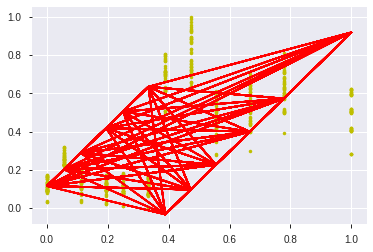

In [95]:
plt.plot(x1_train, y2_train, 'y.',
         x1_train, h2(a2,b2,c2,x1_train,x5_train), 'r')

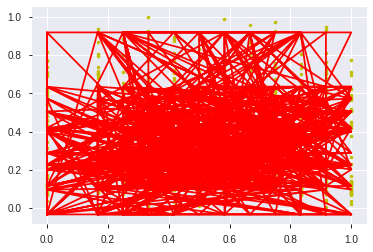

In [96]:
plt.plot(x2_train, y2_train, 'y.',
         x2_train, h2(a2,b2,c2,x1_train,x5_train), 'r')

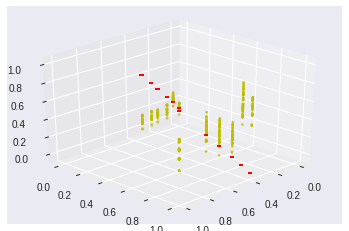

In [97]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)

ax.scatter(x1_train, x5_train, y2_train, c='y', marker='.')
ax.scatter(x1_train, x5_train, h2(a2,b2,c2,x1_train,x5_train), c='r', marker='_')

In [101]:
np.sqrt(error1(a2,b2,c2, x1_train,x5_train,y2_train))

0.27466114395085806

In [102]:
np.sqrt(error1(a2,b2,c2, x1_test,x5_test,y2_test))

0.29622588997117316

## **6.Predict the error difference to confirm the hypothesis**

In [0]:
prediction_difference_train = np.sqrt(error1(a1,b1,c1, x1_train,x5_train,y1_train)) - np.sqrt(error1(a2,b2,c2, x1_train,x5_train,y2_train))

In [104]:
prediction_difference_train

-0.012755235409825427

In [0]:
prediction_difference_test = np.sqrt(error1(a1,b1,c1, x1_test,x5_test,y1_test)) - np.sqrt(error1(a2,b2,c2, x1_test,x5_test,y2_test))

In [106]:
prediction_difference_test

-0.03932872623790673

# **Conclusion**


1.   By performing the data analysis of the Energy Effiency dataset, we learn that it is an estimation(prediction) problem where we determine the targets: Heating Load and Cooling Load.
2.   We use linear regression to predict the values of Heating Load and Cooling Load since the data is continuously distributed in all the attributes. bold text
  
 **3.   Reasons for not using other techniques**


 *   We do not use logistic regression because we are not classifying the data and logistic regression works well for classification problems(the target variables are not binary categorical 0's or 1's)
 *   The dataset used is quite small with 768 instances and only 8 attributes, hence linear regression is preferred over neural networks. The possibility of overfitting the model in neural networks is eliminated by opting linear regression.
 *    Although the data is continuous, it is sparse when correlated with the response variables. Therefore KNN is not used.(The dimensions of the data increases significantly).

4.   The prediction of Heating Load and Cooling Load : Due to high correlation between them, the prediction of either value should lead to the other value.
This Hypothesis is confirmed true when we could predict the values of both the Heating Load and Cooling Load with minor difference.  
5. **Significance of the negative difference:**
    
    prediction_difference_train  =  -0.012755235409825427
    
    prediction_difference_test  =  -0.03932872623790673

    This states that  “Cooling Load” max value is about 5KW larger than “Heating Load” max value and “Heating Load” min value is about 4KW lower than “Cooling Load” min value. For this particular dataset we can say that the energy needed to cool the house is slightly greater than that required to heat it.


    





# **An interesting side note : Climate Change and Energy Efficiency**

Climate change may seriously affect the energy consumption of buildings by influencing their air conditioning loads, especially the ventilation loads which vary directly with the local weather conditions. 

Climate warming increases both sensible and latent parts of the cooling ventilation load. The latent part, which occupies ∼80% of the total ventilation load, increases at a higher rate, about twice of that of the sensible one. 

Furthermore, it is found that the urban heat island (UHI) effect causes a much higher growth rate of the ventilation load at night, which is about three times compared with that in the daytime. The latent part of the cooling ventilation load at night, which is found to be the most sensitive component to the climate change, plays a most significant role in the energy consumption increase.

The possible measures were thus suggested to avoid negative changes of the ventilation load. Besides, reducing the UHI effect by better urban planning also significantly benefits the local buildings with a long air-conditioning operation time.

**Reference to the paper used for the study**

https://www.slideshare.net/AnkitGhosalkar/project-report-on-energy-efficiency-dataset